In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
plt.rcParams['figure.figsize'] = [20, 15]

In [3]:
## Build geno dict for text replacement
df = pd.read_excel('geno-database.xlsx')
# converting df to series, and then to dict
geno_dict = df.set_index('ID')['Shortname']

In [4]:
df1 = pd.read_csv('monthly_data_0.txt', sep='\t')
df2 = pd.read_csv('mut_arrival.txt', sep='\t')

In [5]:
df2['time'] /= 365 # scaling down time to in unit of year

In [6]:
# Text replacement
df2['to'] = df2['to'].replace(geno_dict)
df2['from'] = df2['from'].replace(geno_dict)

In [7]:
df2

,time,from,to
0,10.008219,TYY--C1x,KYY--C1x
1,10.008219,TYY--C1x,KYY--C1x
2,10.008219,TNY--C1x,KNY--C1x
3,10.010959,TNY--C1x,TNF--C1x
4,10.010959,TYY--C1x,KYY--C1x
5,10.010959,TYY--C1x,TYY--Y1x
6,10.010959,TNY--C1x,KNY--C1x
7,10.010959,TNY--C1x,TNYNYC1x
8,10.010959,TNY--C1x,TNY--Y1x
9,10.010959,TYY--C1x,KYY--C1x


In [8]:
# Selecting rows with regex
filtered = df2[df2['to'].str.contains('.....Y2.')]

In [9]:
#df1['year']=2000

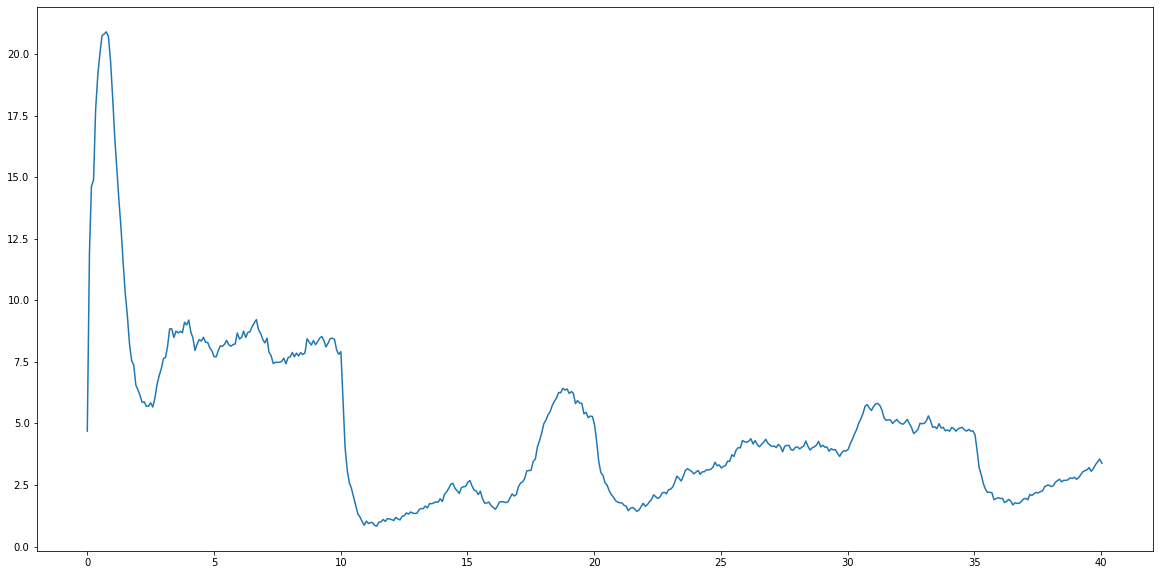

In [10]:
scale_x = 365
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))

fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.plot(df1['current_time'], df1['blood_slide_prev'])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1825))
ax1.xaxis.set_major_formatter(ticks_x)

In [11]:
filtered.to_csv('filtered.txt', sep='\t', encoding='utf-8')

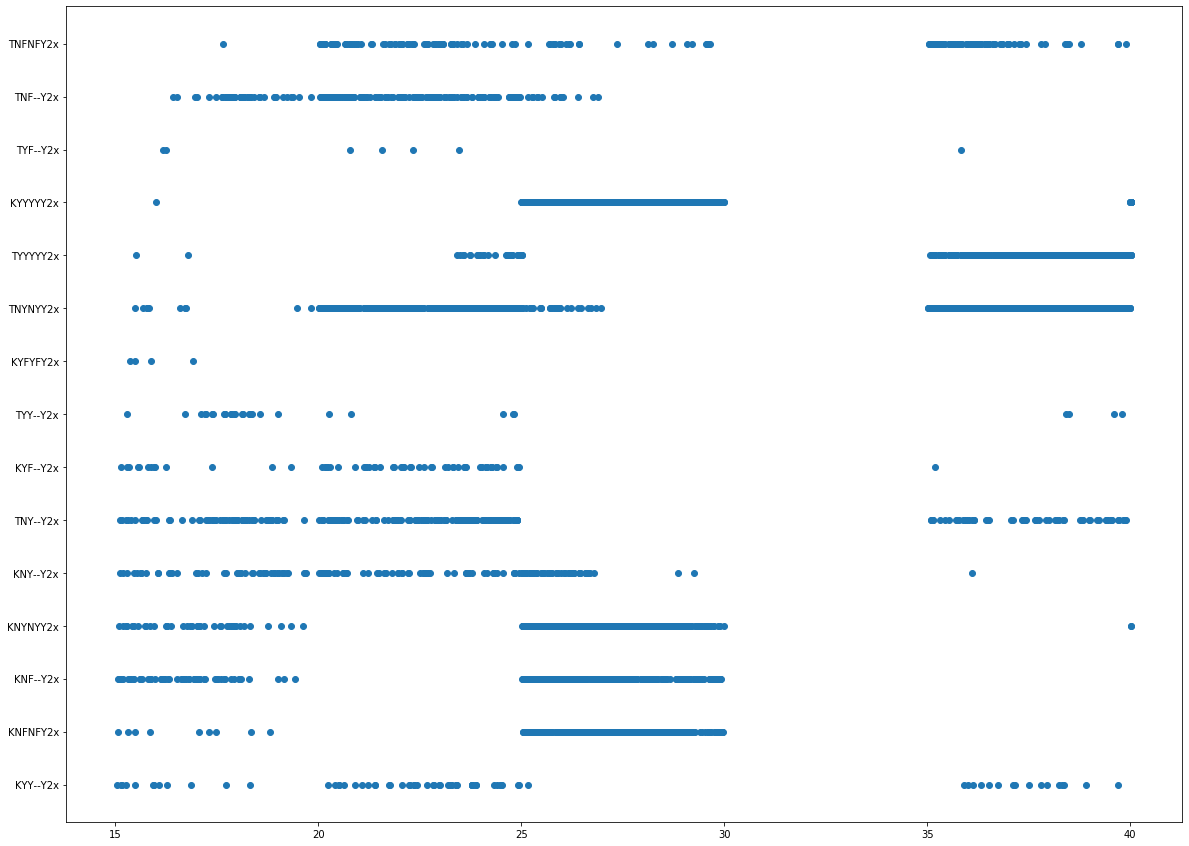

In [12]:
# %matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(filtered['time'], filtered['to']) # filtering the double-res type
#ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

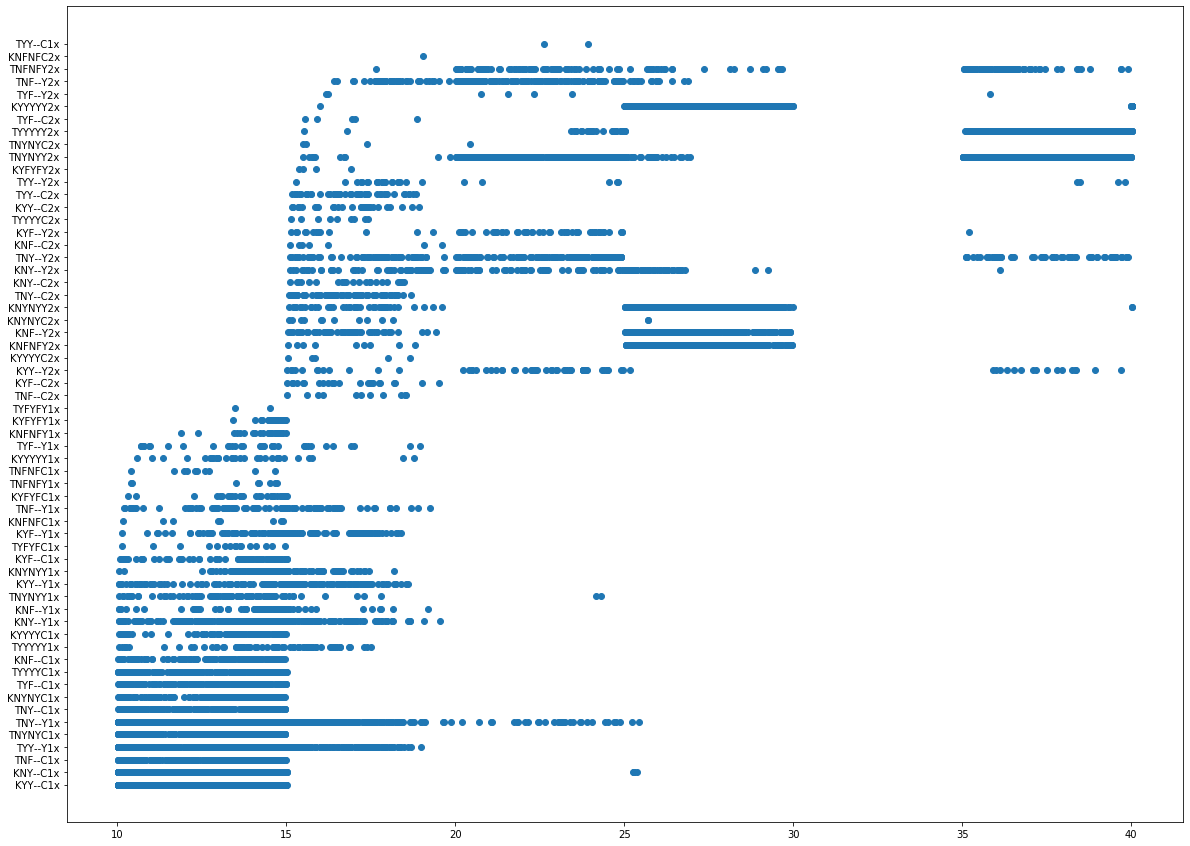

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df2['time'], df2['to']) # filtering the double-res type
#ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

In [14]:
filtered

,time,from,to
5181,15.032877,KYY--Y1x,KYY--Y2x
5191,15.060274,KNFNFY1x,KNFNFY2x
5194,15.063014,KNF--Y1x,KNF--Y2x
5203,15.079452,KNYNYY1x,KNYNYY2x
5209,15.098630,KNF--Y1x,KNF--Y2x
5213,15.106849,KNF--Y1x,KNF--Y2x
5215,15.106849,KNY--Y1x,KNY--Y2x
5221,15.115068,TNY--Y1x,TNY--Y2x
5230,15.128767,KYY--Y1x,KYY--Y2x
5237,15.147945,KYF--Y1x,KYF--Y2x


In [15]:
filtered.groupby('KYY--Y2x').count()

KeyError: 'KYY--Y2x'